In [15]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_jit as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [16]:

model = toy.SmolModel(None,None)


true_parameters = [0.0003, 900]


times = np.linspace(20, 97, 78)

df = pd.read_csv('s11_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)

centred_moments = np.zeros((78,5))
centred_moments[:,0] = centred_moment_1
centred_moments[:,1] = centred_moment_2
centred_moments[:,2] = centred_moment_3
centred_moments[:,3] = centred_moment_4
centred_moments[:,4] = centred_moment_5

# print(centred_moments.shape)


Add noise to the data (using random sampling from normal distribution)

In [17]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 5
noise_value = 25
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]
noise_arr[0] = 1
noise_arr[1] = 10
noise_arr[2] = 100
noise_arr[3] = 5000
noise_arr[4] = 500000


Set-up pints problem and log likelihoods

In [18]:

problem = pints.MultiOutputProblem(model, times, centred_moments)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 7


Create uniform log prior

In [19]:

# Define the size of the list
size = 7
placeholder_lower_value = 0
placeholder_upper_value = 1000
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.0001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 10000
prior_arr_lower[2] = 0
prior_arr_upper[2] = 10
prior_arr_lower[3] = 0
prior_arr_upper[3] = 20
prior_arr_lower[4] = 0
prior_arr_upper[4] = 2000
prior_arr_lower[5] = 0
prior_arr_upper[5] = 20000
prior_arr_lower[6] = 0
prior_arr_upper[6] = 1000000


# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_28520/1970584665.py:29: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [20]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 10000
mcmc = pints.MCMCController(log_posterior, 3, xs, method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.0
1     417     0:01.0
2     801     0:02.0
3     1194    0:02.9
20    7224    0:16.6
40    15822   0:35.8
60    27204   0:58.9
80    40839   1:25.7
100   57177   1:55.9
120   75777   2:30.7
140   97215   3:09.6
160   120630   3:51.6
180   146517   4:37.1
200   173637   5:24.2
220   203868   6:16.1
240   235113   7:10.4
260   269571   8:08.6
280   306333   9:10.5
300   345159  10:15.7
320   386886  11:25.6
340   431577  12:40.4
360   478824  13:58.7
380   528147  15:19.8


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:832: RuntimeWarning: invalid value encountered in divide
  - np.sum(error**2, axis=0) / (2 * sigma**2))


400   577515  16:45.6
420   627018  18:10.6
440   676881  19:35.1
460   726486  20:58.0
480   775704  22:22.0
500   824760  23:43.1
520   874587  25:08.8
540   924237  26:34.0
560   973941  28:02.9
580   1024050  29:32.9
600   1073790  31:01.9
620   1123389  32:30.7
640   1172829  33:58.2
660   1222557  35:27.2
680   1271856  36:55.4
700   1321413  38:24.3
720   1371879  39:52.8
740   1421301  41:22.1
760   1470459  42:51.1
780   1520259  44:19.1
800   1569399  45:45.6
820   1618335  47:14.3
840   1668108  48:43.2
860   1717974  50:12.2
880   1767189  51:38.7
900   1816893  53:07.7
920   1866588  54:35.3
940   1916187  56:03.7
960   1965447  57:29.7
980   2015295  58:56.2
1000  2064837  60:21.5
1020  2114823  61:47.6
1040  2164797  63:14.8
1060  2214612  64:41.2
1080  2263950  66:08.0
1100  2313060  67:34.7
1120  2362638  69:00.1
1140  2411952  70:25.4
1160  2462193  71:53.9
1180  2511399  73:18.5
1200  2560908  74:43.5
1220  2610408  76:10.0
1240  2659896  77:36.7
1260  2709945  79:03

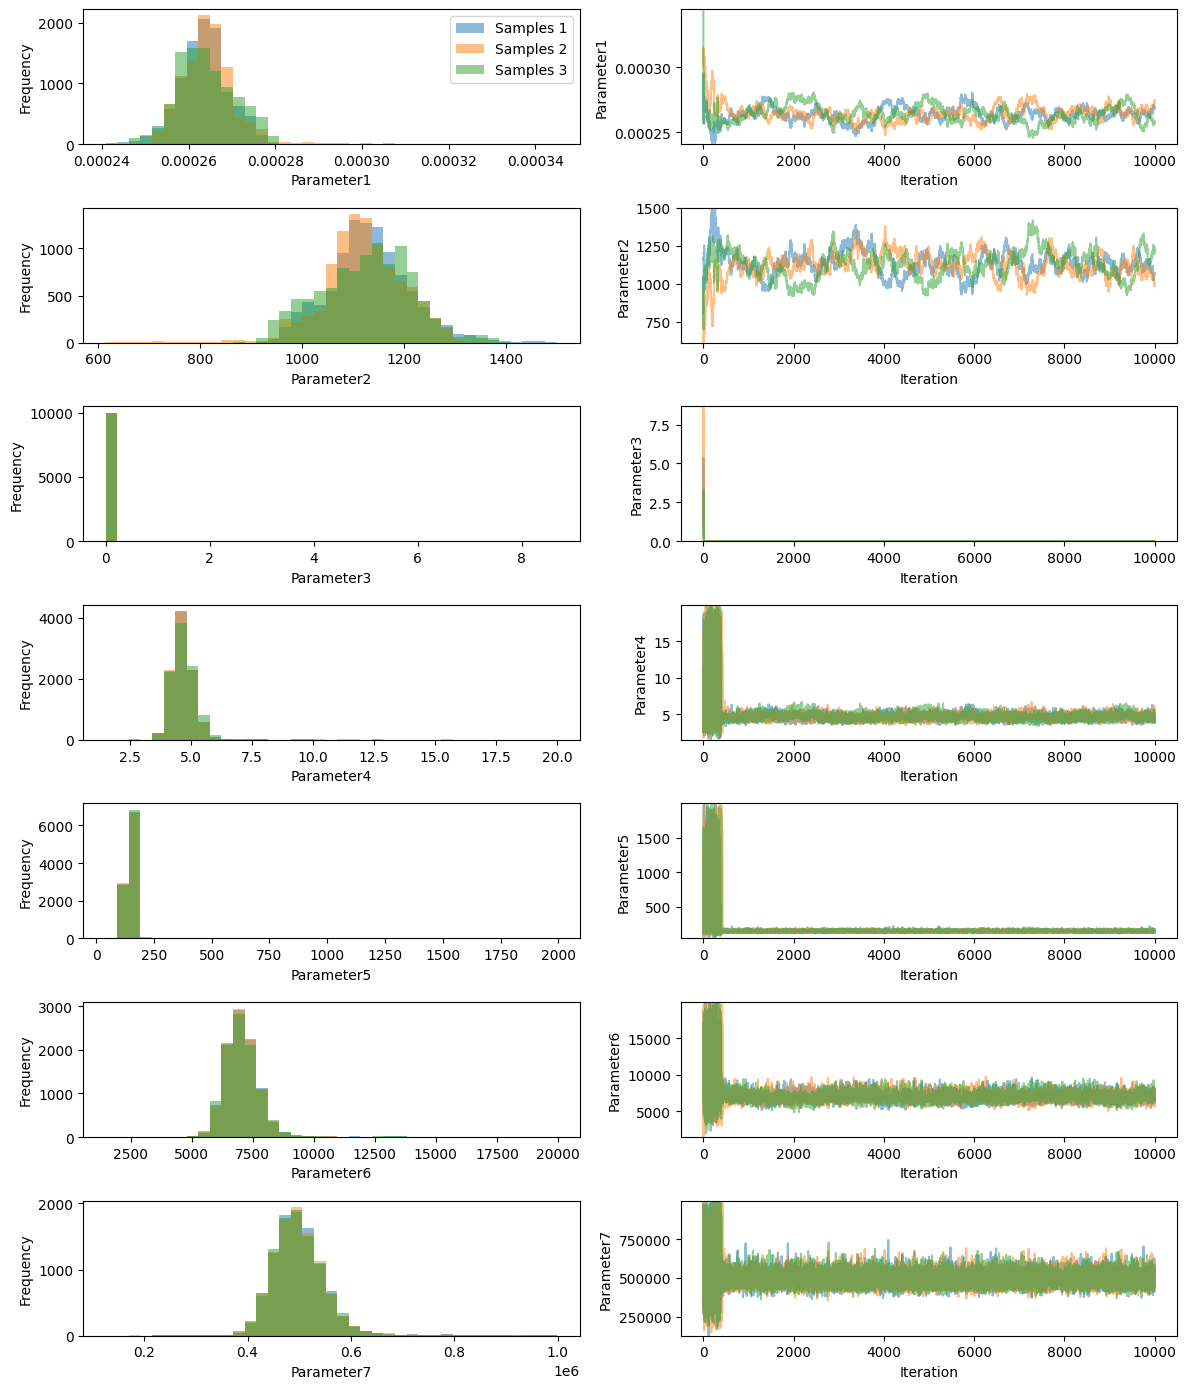

In [52]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()


In [95]:

# ITERS = 100
AllChains = chains[0,1000:10000,:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(9000, 7)
[2.66815354e-004 1.08603238e+003 1.57592303e-162 4.13897911e+000
 1.39746076e+002 6.56836773e+003 6.06809443e+005]
[[2.66815354e-004 1.08603238e+003 1.57592303e-162 ... 1.39746076e+002
  6.56836773e+003 6.06809443e+005]
 [2.66753693e-004 1.08365479e+003 1.59054842e-162 ... 1.48693850e+002
  7.29414003e+003 4.35218703e+005]
 [2.67059294e-004 1.08829849e+003 1.58668605e-162 ... 1.34020411e+002
  7.74631285e+003 4.39305475e+005]
 ...
 [2.68371304e-004 1.05931704e+003 1.58685605e-162 ... 1.57307151e+002
  6.62358615e+003 5.89631093e+005]
 [2.68684220e-004 1.05930995e+003 1.58632701e-162 ... 1.65847543e+002
  6.88743280e+003 4.21396021e+005]
 [2.69690049e-004 1.06314011e+003 1.58537130e-162 ... 1.50967653e+002
  6.70615747e+003 4.12325853e+005]]


In [96]:

for I in range(3-1):
    AllChains_add = chains[I+1,1000:10000,:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


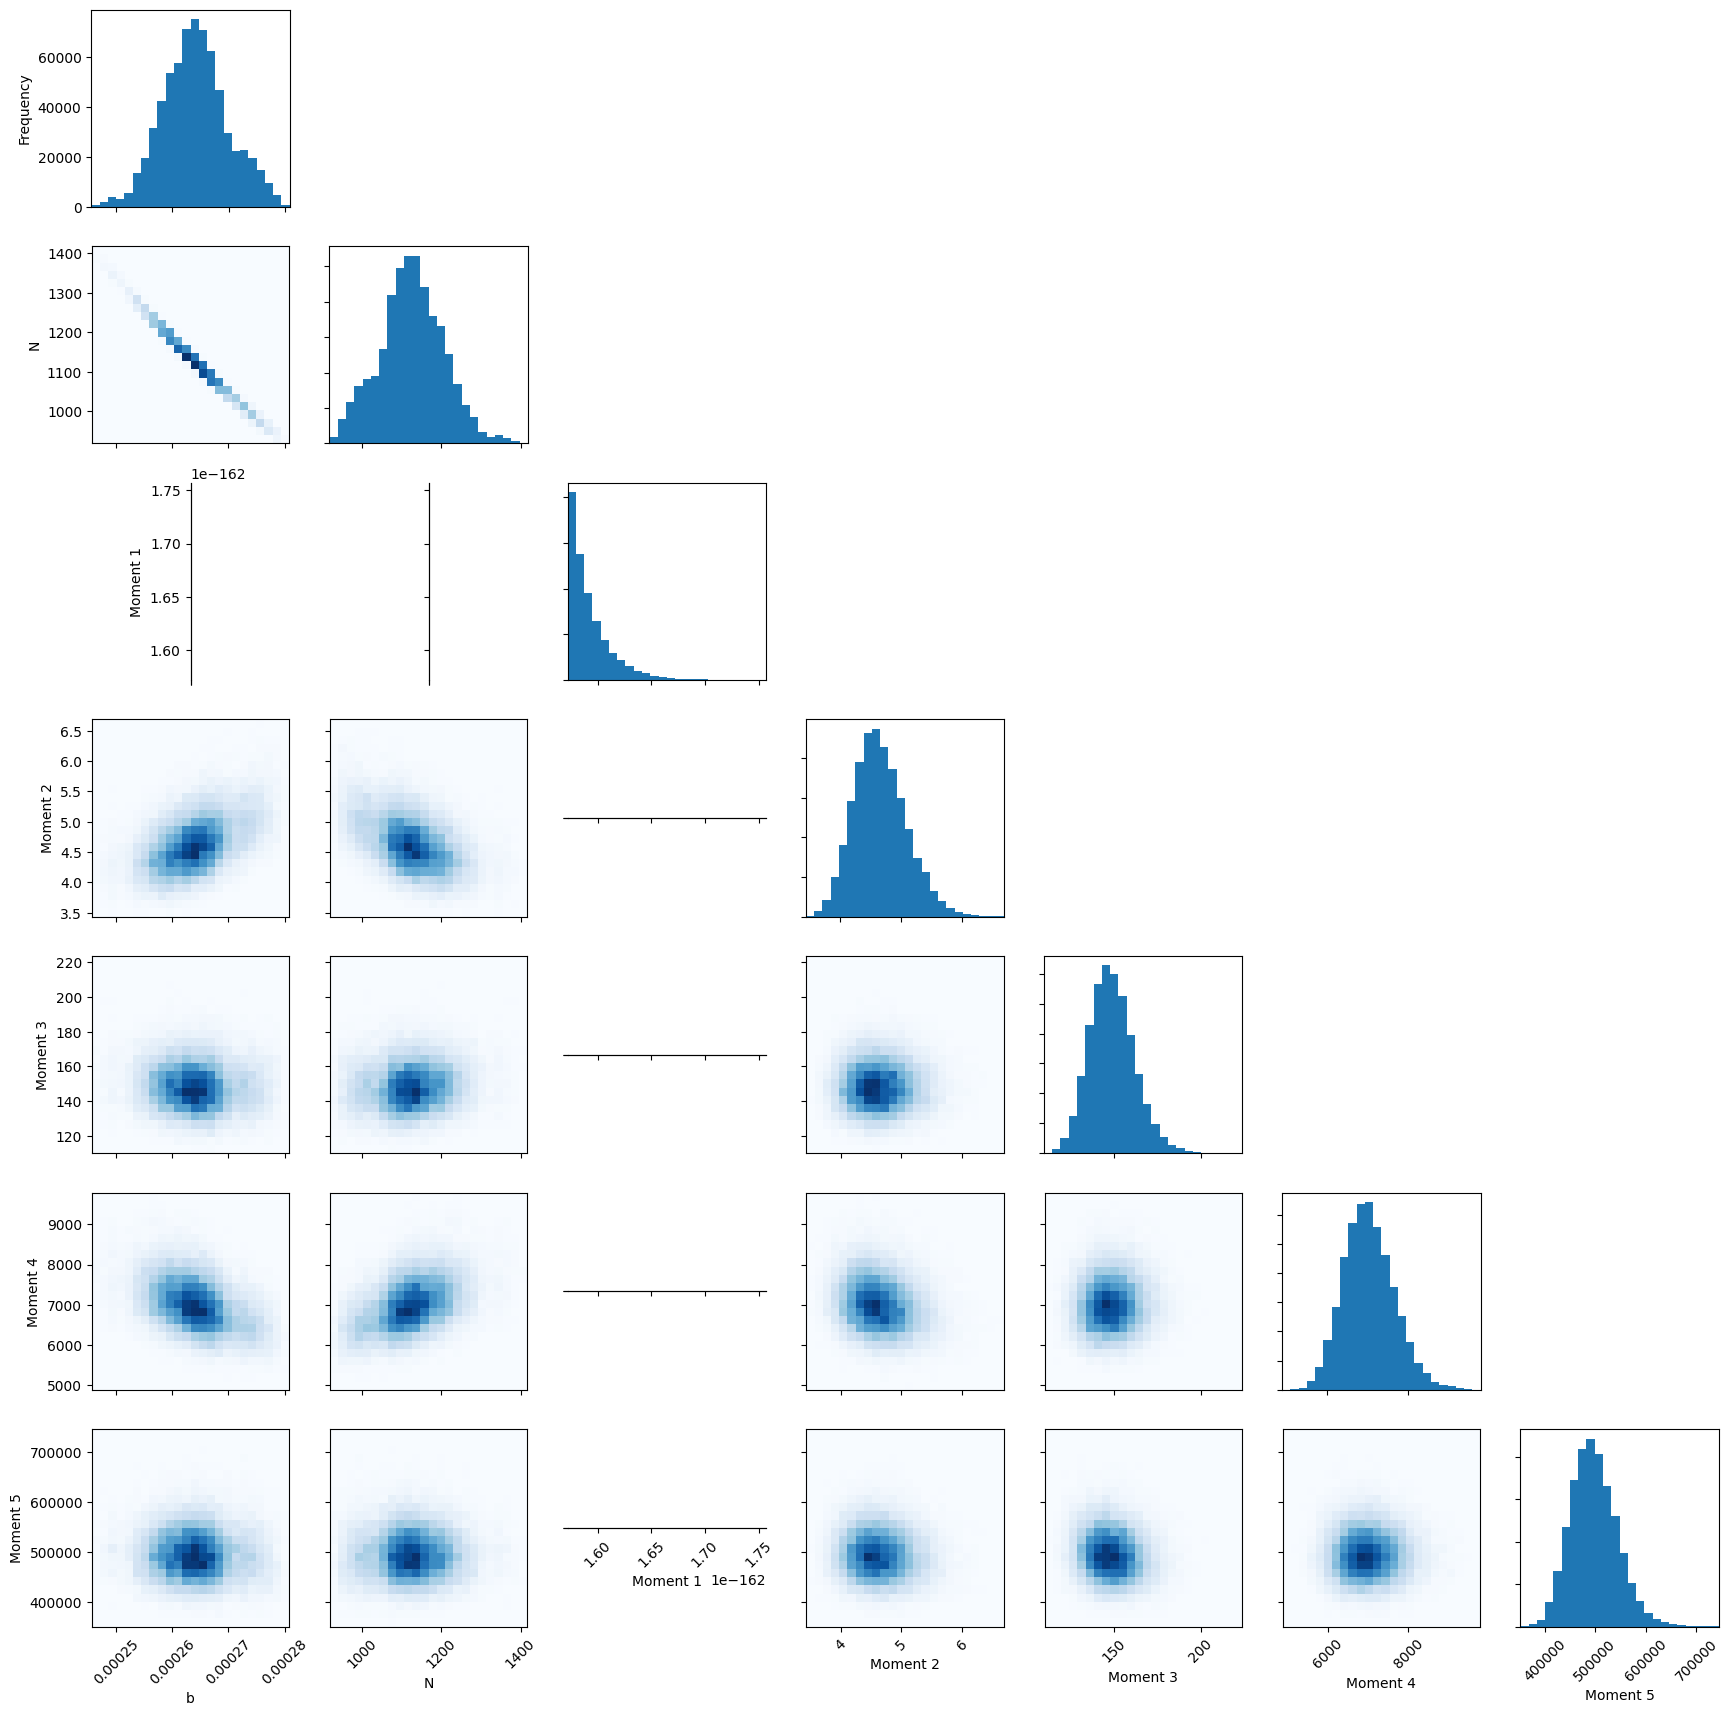

In [97]:


parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"])
plt.show()

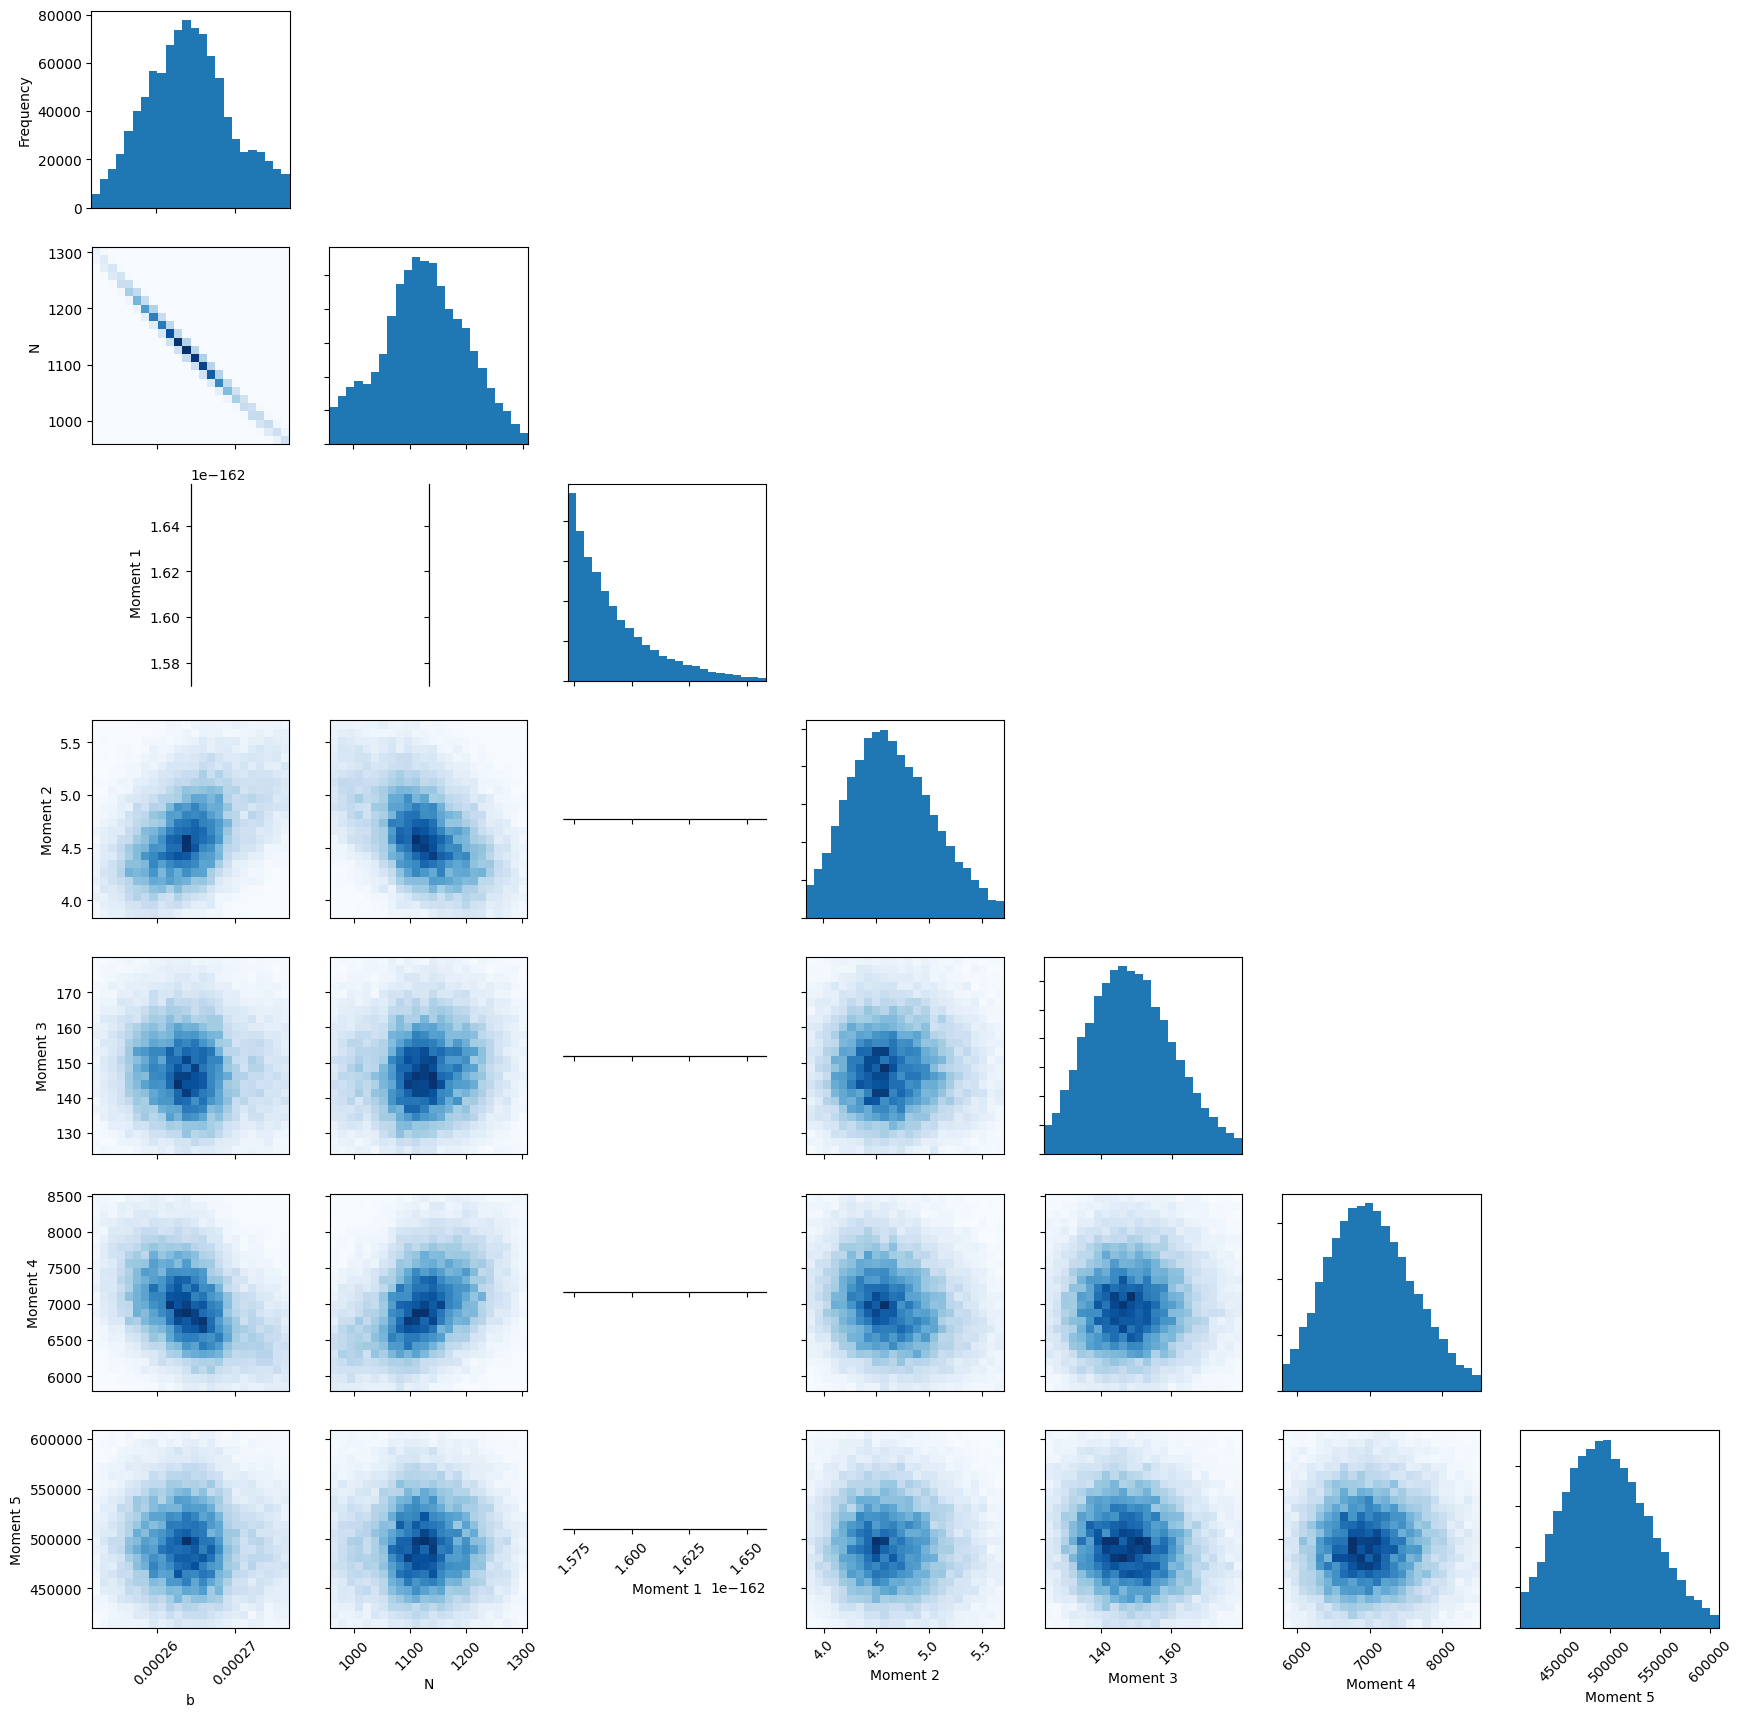

In [98]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"],
                    n_percentiles=97)
                    
plt.show()

[2.66815354e-004 1.08603238e+003 1.57592303e-162 4.13897911e+000
 1.39746076e+002 6.56836773e+003 6.06809443e+005]


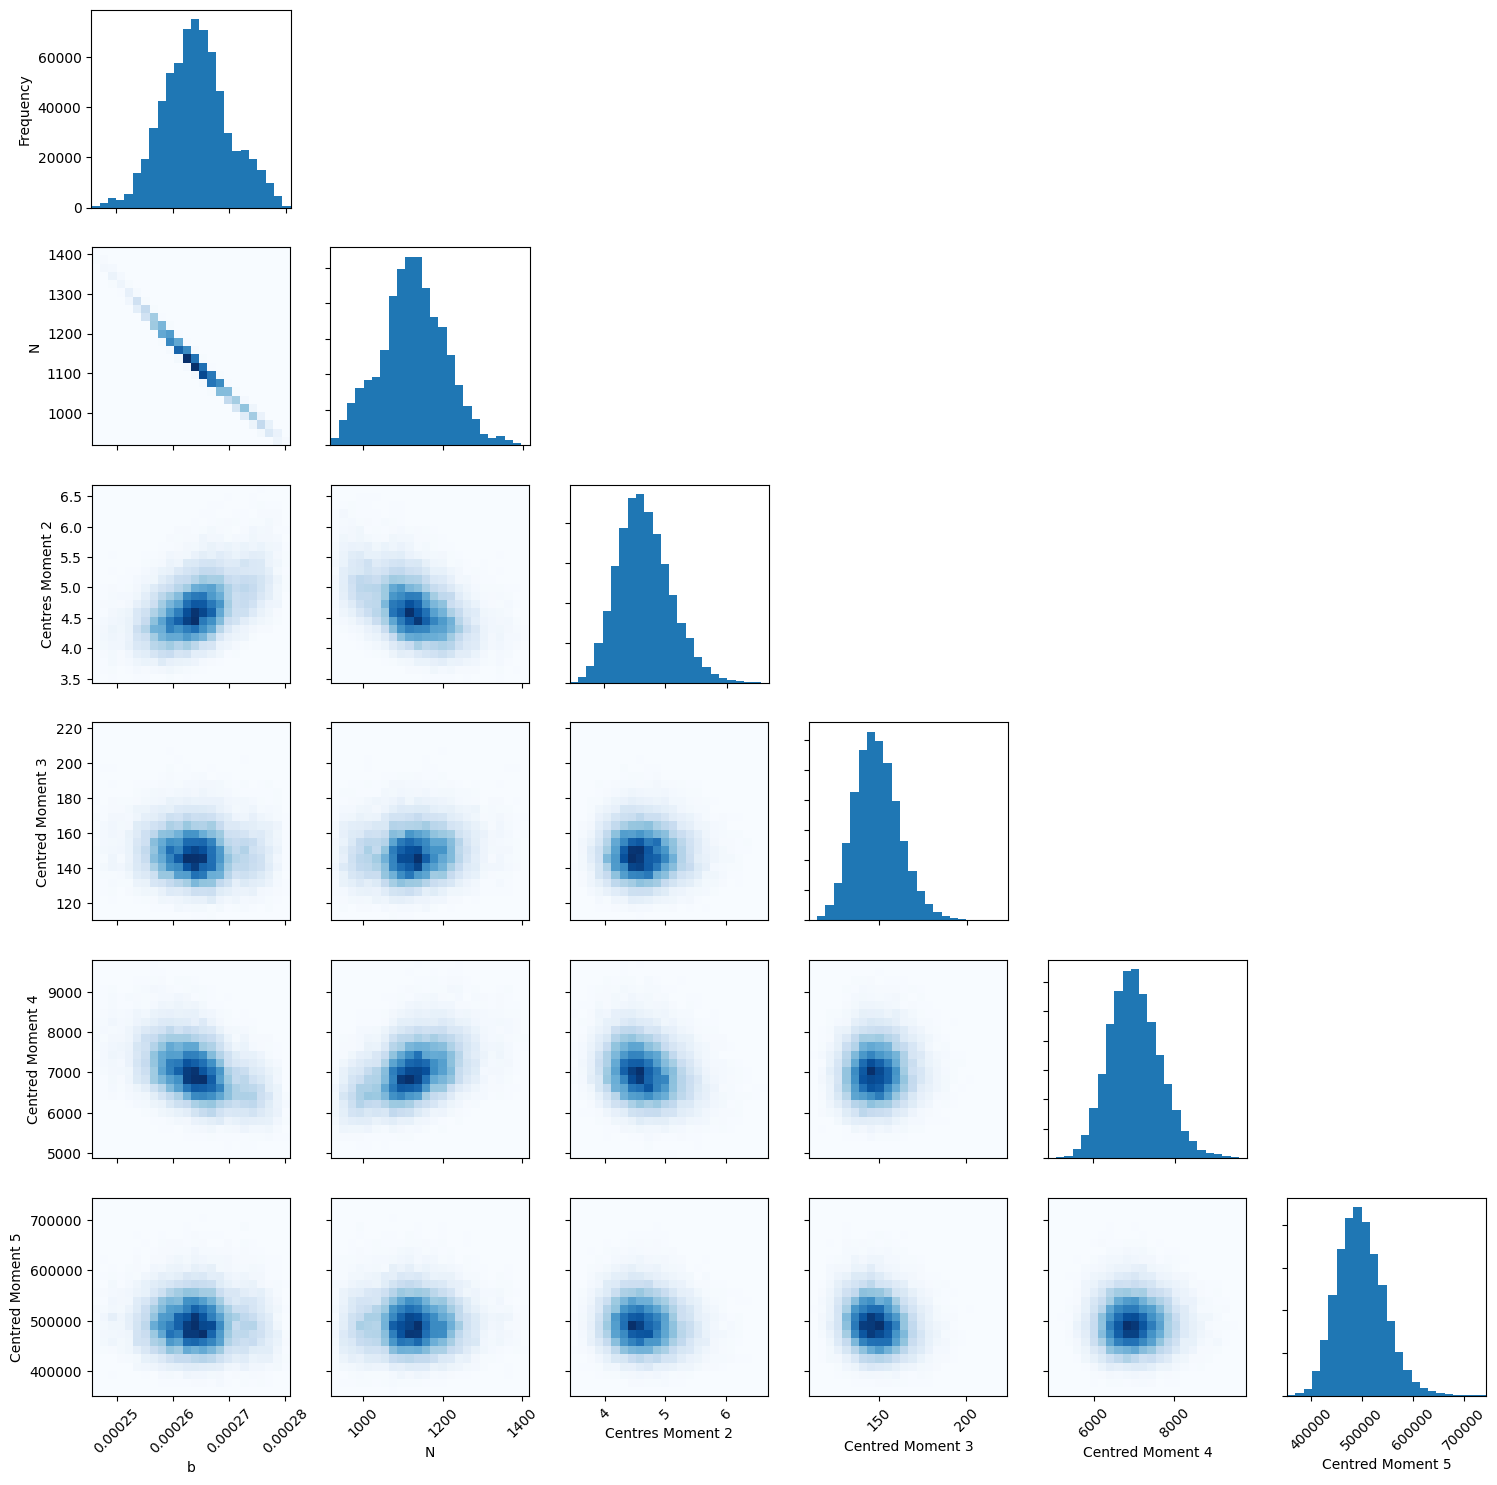

In [102]:
parameter_names = ["b","N", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)
print(AllChains[0])
pints.plot.pairwise(AllChains[:,[0,1,3,4,5,6]], heatmap=True, 
                    parameter_names=["b","N", "Centres Moment 2", "Centred Moment 3", "Centred Moment 4", "Centred Moment 5"])
plt.savefig("Pints_pairwise.png", dpi =300)
plt.show()


In [60]:
parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
results = pints.MCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_diagnostics.py:235: RuntimeWarning: invalid value encountered in divide
  rhat = np.sqrt((n - 1.0) / n + b / (w * n))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_diagnostics.py:16: RuntimeWarning: divide by zero encountered in divide
  x = (x - np.mean(x)) / (np.std(x) * np.sqrt(len(x)))


<class 'pints._mcmc._summary.MCMCSummary'>
param     mean       std.      2.5%       25%        50%        75%        97.5%      rhat    ess      ess per sec.
--------  ---------  --------  ---------  ---------  ---------  ---------  ---------  ------  -------  --------------
b         0.00       0.00      0.00       0.00       0.00       0.00       0.00       1.02    67.73    0.00
N         1125.93    77.39     975.99     1075.65    1123.14    1177.10    1282.27    1.03    68.79    0.00
Moment 1  0.00       0.00      0.00       0.00       0.00       0.00       0.00       nan     nan      nan
Moment 2  4.66       0.43      3.90       4.35       4.63       4.92       5.57       1.00    321.46   0.01
Moment 3  148.96     12.73     126.23     140.00     148.24     156.91     176.14     1.00    3859.77  0.09
Moment 4  7028.31    618.73    5936.47    6593.04    6990.07    7421.34    8343.18    1.00    480.94   0.01
Moment 5  497710.03  45557.98  417391.85  465577.07  494647.42  526800.92  5

In [62]:
from tabulate import tabulate
class MyMCMCSummary(pints.MCMCSummary):
    def __str__(self):
        """
        Prints posterior summaries for all parameters to the console, including
        the parameter name, posterior mean, posterior std deviation, the
        2.5%, 25%, 50%, 75% and 97.5% posterior quantiles, rhat, effective
        sample size (ess) and ess per second of run time.
        """
        if self._summary_str is None:
            headers = [
                'param', 'mean', 'std.',
                '2.5%', '25%', '50%', '75%', '97.5%',
                'rhat', 'ess']
            if self._time is not None:
                headers.append('ess per sec.')

            self._summary_str = tabulate(
                self._summary_list,
                headers=headers,
                numalign='left',
                floatfmt='.3g',
            )

        return self._summary_str
    


In [63]:

parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
results = MyMCMCSummary(chains=chains[:,int(ITERS/2):, :], time=mcmc.time(),
                            parameter_names = parameter_names)
print(type(results))
print(results)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_diagnostics.py:235: RuntimeWarning: invalid value encountered in divide
  rhat = np.sqrt((n - 1.0) / n + b / (w * n))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_diagnostics.py:16: RuntimeWarning: divide by zero encountered in divide
  x = (x - np.mean(x)) / (np.std(x) * np.sqrt(len(x)))


<class '__main__.MyMCMCSummary'>
param     mean       std.      2.5%       25%        50%        75%       97.5%      rhat    ess       ess per sec.
--------  ---------  --------  ---------  ---------  ---------  --------  ---------  ------  --------  --------------
b         0.000264   5.53e-06  0.000253   0.00026    0.000264   0.000268  0.000276   1.02    67.7      0.00162
N         1.13e+03   77.4      976        1.08e+03   1.12e+03   1.18e+03  1.28e+03   1.03    68.8      0.00164
Moment 1  1.59e-162  0         1.57e-162  1.58e-162  1.59e-162  1.6e-162  1.65e-162  nan     nan       nan
Moment 2  4.66       0.429     3.9        4.35       4.63       4.92      5.57       1       321       0.00768
Moment 3  149        12.7      126        140        148        157       176        1       3.86e+03  0.0922
Moment 4  7.03e+03   619       5.94e+03   6.59e+03   6.99e+03   7.42e+03  8.34e+03   1       481       0.0115
Moment 5  4.98e+05   4.56e+04  4.17e+05   4.66e+05   4.95e+05   5.27e+05 

TypeError: 'module' object is not subscriptable

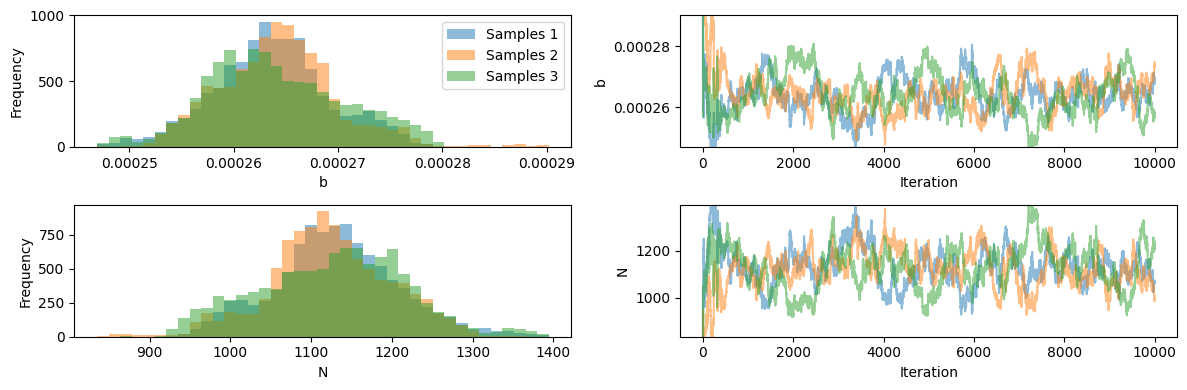

In [88]:
pints.plot.trace(chains[:,:,[0,1]], n_percentiles=99.5, parameter_names=["b","N"])
plt.savefig("pints_out_extremes_removed.png", dpi=300)
plt.show()
pints.plot.trace(chains[:,:,[0,1]], parameter_names=["b","N"])
plt.savefig("pints_out.png", dpi=300)
plt.show()